In [2]:
import pandas as pd
import datatable as dt
import matplotlib.pyplot as plt
import datashader as ds
import colorcet as cc
import seaborn as sns
import numpy as np

In [13]:
#TODO fix the graph
#TODO interphet the results
#TODO find outliers in scatterplot

In [3]:
%%time

posts = dt.fread("instagram_posts.csv", columns={"post_id", "numbr_likes", "number_comments", "cts"}).to_pandas()

CPU times: total: 3min 23s
Wall time: 53.2 s


## Q8.1 Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

After reading the right column that we need for this exercises we plot the scatterplot

In [3]:
posts.head()

,post_id,numbr_likes,number_comments
0,BXdjjUlgcgq,80.0,0.0
1,BVg0pbolYBC,25.0,1.0
2,BRgkjcXFp3Q,9.0,0.0
3,BKTKeNhjEA7,4.0,0.0
4,8-NQrvoYLX,8.0,0.0


In [4]:
posts.shape

(42710197, 3)

In [5]:
posts = posts.dropna()

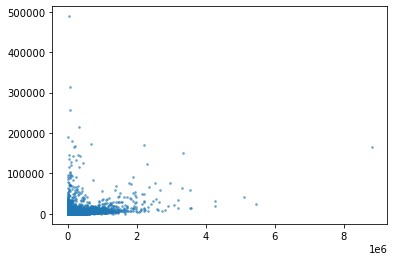

In [10]:
plt.scatter(posts['numbr_likes'], posts['number_comments'],s=3, alpha=0.5)
plt.show()

To have a better understanding of what we are trying to find (the correlation) we are gonna calculate the pearson correlation coefficient

In [11]:
posts.number_comments.corr(posts.numbr_likes)

0.3744527992482446

As we can see from the scatterplot above and the result value from the pearson correlation coefficient. If the number of likes were related to the number of comments then we would be seeing a proportional increase of both value, while from the scatterplot we see that at the increase of the number of likes, the number of comments doesnt increase.

In [14]:
#n_likes = posts.numbr_likes.apply(lambda x: x+1)
#n_likes_log = n_likes.apply(np.log)
#n_c = posts.number_comments.apply(lambda x: x+1)
#n_co = n_c.apply(np.log)
#plt.scatter(n_co, n_likes_log,s=3, alpha=0.5)
#plt.show()

## Let's try seaborn

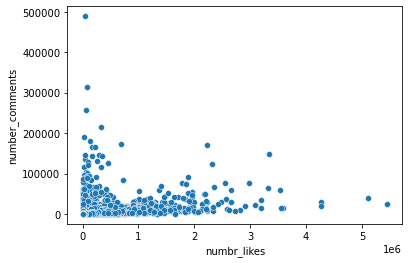

In [12]:
sns.scatterplot(data=posts, x = posts['numbr_likes'], y=posts['number_comments'])
plt.show()

## Q8.2 Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

In [10]:

from datetime import datetime

In [4]:
posts.dtypes

post_id                    object
cts                datetime64[ns]
numbr_likes               float64
number_comments           float64
dtype: object

In [17]:
range = []
timestamp_list = pd.date_range("00:00:00", "23:59:59", freq='2h')
for i in timestamp_list:
    range.append((i.hour, i.minute, i.second))
range

[(0, 0, 0),
 (2, 0, 0),
 (4, 0, 0),
 (6, 0, 0),
 (8, 0, 0),
 (10, 0, 0),
 (12, 0, 0),
 (14, 0, 0),
 (16, 0, 0),
 (18, 0, 0),
 (20, 0, 0),
 (22, 0, 0)]

In [37]:

prova = posts[['cts', 'number_comments', 'numbr_likes']]
prova.set_index("cts")
prova.head()
prova['cts'] = pd.to_timedelta(datetime.strptime(prova['cts'].to_string(), )

,cts,number_comments,numbr_likes
0,2017-08-06 20:06:57,0.0,80.0
1,2017-06-19 09:31:16,1.0,25.0
2,2017-03-11 20:05:03,0.0,9.0
3,2016-09-13 16:27:16,0.0,4.0
4,2015-10-18 10:19:27,0.0,8.0


In [45]:
prova['cts'] = pd.to_timedelta(prova['cts'].map(str))
#prova = prova.groupby(prova.cts.dt.floor('2H')).count()


In [8]:
times = pd.to_datetime(posts.cts)
posts.groupby([times.dt.hour, times.dt.minute]).sum()
posts

C:\Users\Matteo\AppData\Local\Temp\ipykernel_4448\796733484.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  posts.groupby([times.dt.hour, times.dt.minute]).sum()


,post_id,cts,numbr_likes,number_comments
0,BXdjjUlgcgq,2017-08-06 20:06:57,80.0,0.0
1,BVg0pbolYBC,2017-06-19 09:31:16,25.0,1.0
2,BRgkjcXFp3Q,2017-03-11 20:05:03,9.0,0.0
3,BKTKeNhjEA7,2016-09-13 16:27:16,4.0,0.0
4,8-NQrvoYLX,2015-10-18 10:19:27,8.0,0.0
...,...,...,...,...
42710192,BcpWMWGBfxh,2017-12-13 15:38:04,74.0,0.0
42710193,Ba6LZWwlCl8,2017-10-31 11:28:01,49.0,0.0
42710194,BPN0kM1hYUw,2017-01-13 20:16:37,18.0,0.0
42710195,BxsZ8nDBr-L,2019-05-20 20:07:52,27.0,1.0


In [10]:
posts = posts.set_index('cts') 
posts.cts = pd.to_timedelta(posts.index.astype(str))

posts = posts.resample('4H').sum()

KeyboardInterrupt: 

## Q8.3 What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

In [4]:
%%time

profiles = dt.fread("instagram_profiles.csv").to_pandas()

CPU times: total: 16.7 s
Wall time: 7.77 s


In [18]:
followers = profiles['followers']
#lets drop the Na
followers = followers.dropna()



Per avere una maggiore interpretabilità della distribuzione usiamo la scala logaritmica, però abbiamo moltissimi valori = 0. Per risolvere questo problema prima aumentiamo tutti i valori di 1, in questa maniera non avremo più valori uguali a zero e allo stesso tempo la distribuzione rimane invariata.

Successivamente plottiamo

In [26]:
f_plus_1 = followers.apply(lambda x: x+1)
followers_log = f_plus_1.apply(np.log)

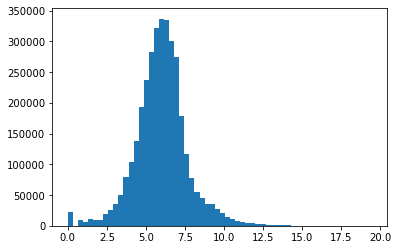

In [34]:
plt.hist(followers_log, bins=60)
plt.show()

<AxesSubplot:xlabel='followers', ylabel='Count'>

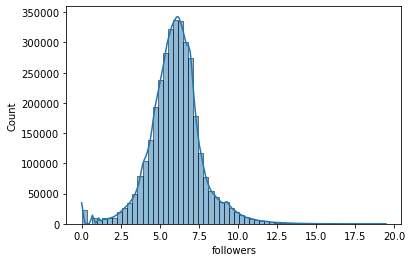

In [44]:
#lets plot the density function of the distribution of followers
sns.histplot( ciao , kde = True, bins=60)

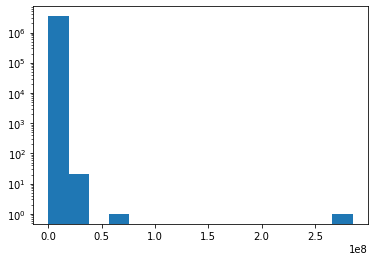

In [20]:
plt.hist(followers, log=True, bins=15)
plt.show()

In [17]:
followers = profiles[profiles.followers < 30000] 
followers.followers.max()

29999.0

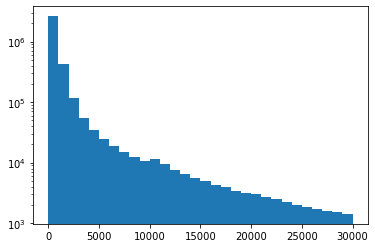

In [18]:
plt.hist(followers.followers, log = True, bins=30)
plt.show()

In [33]:
profiles.followers.describe()

count    3.452771e+06
mean     4.739899e+03
std      1.939087e+05
min      0.000000e+00
25%      1.590000e+02
50%      4.060000e+02
75%      9.740000e+02
max      2.854576e+08
Name: followers, dtype: float64

In [21]:
profiles.mean()